# Time series analysis

# 1. Imports

## 1.1 Packages

In [5]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

## 1.2 Options

## 1.3 Dataset

In [6]:
df_train = pd.read_parquet("../data/04_feature/df_train_w_workday.parquet")

df_test = pd.read_parquet("../data/04_feature/df_test_w_workday.parquet")

In [10]:
print(df_train["date"].min())
print(df_train["date"].max())

print(df_test["date"].min())
print(df_test["date"].max())

2013-01-01 00:00:00
2017-08-15 00:00:00
2017-08-16 00:00:00
2017-08-31 00:00:00


# 2. ACF and PACF

In [8]:
df_train.sample(5)

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type,...,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,season,holiday_type,is_workday
2991015,2937555,2017-07-11,31,PLAYERS AND ELECTRONICS,3.0,0,1358.0,Babahoyo,Los Rios,B,...,3,False,False,False,False,False,False,2,None,1
2964038,2912360,2017-06-27,25,FROZEN FOODS,55.0,0,707.0,Salinas,Santa Elena,D,...,2,False,False,False,False,False,False,2,None,1
892768,883858,2014-05-12,9,LADIESWEAR,0.0,0,1914.0,Quito,Pichincha,B,...,2,False,False,False,False,False,False,1,Holiday_Local,1
2359649,2316881,2016-07-27,17,HOME APPLIANCES,0.0,0,1346.0,Quito,Pichincha,C,...,3,False,False,False,False,False,False,2,None,1
2836686,2788572,2017-04-18,51,CELEBRATION,5.0,0,1404.0,Guayaquil,Guayas,A,...,2,False,False,False,False,False,False,1,None,1


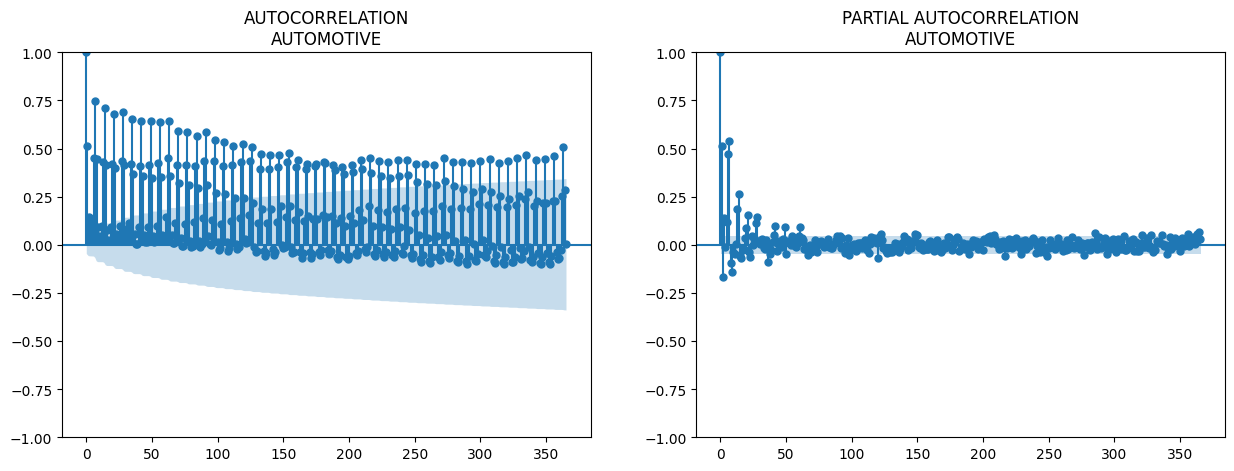

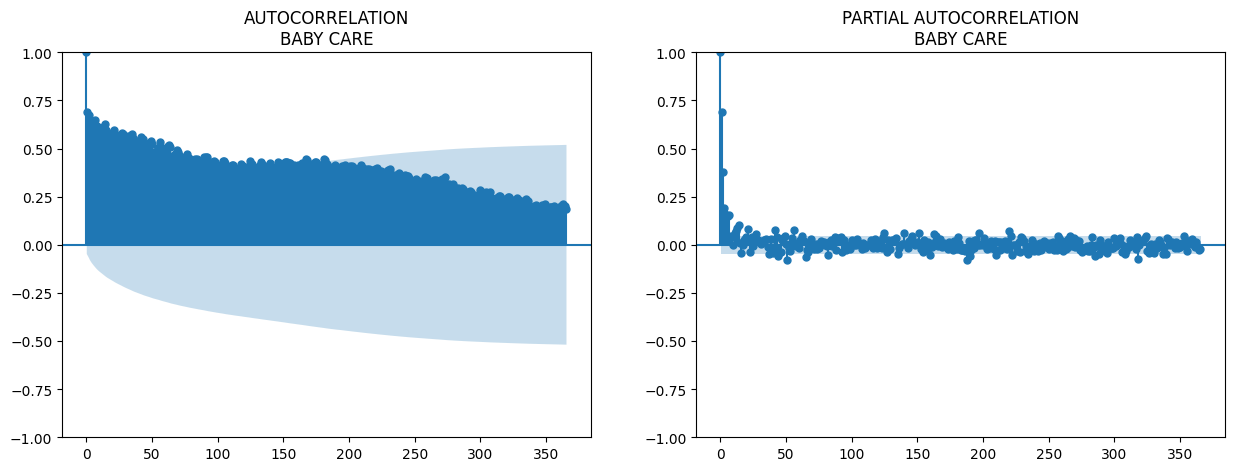

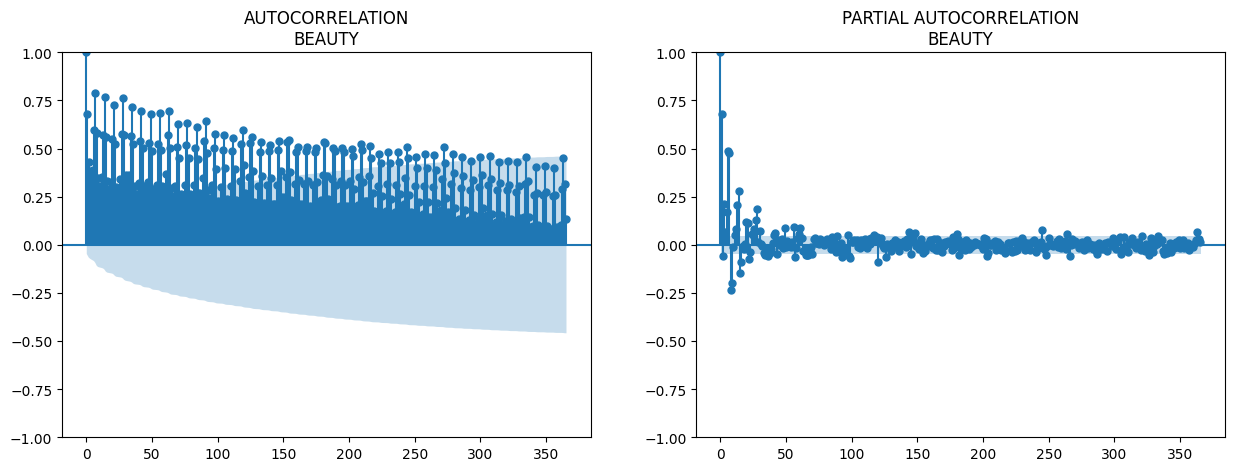

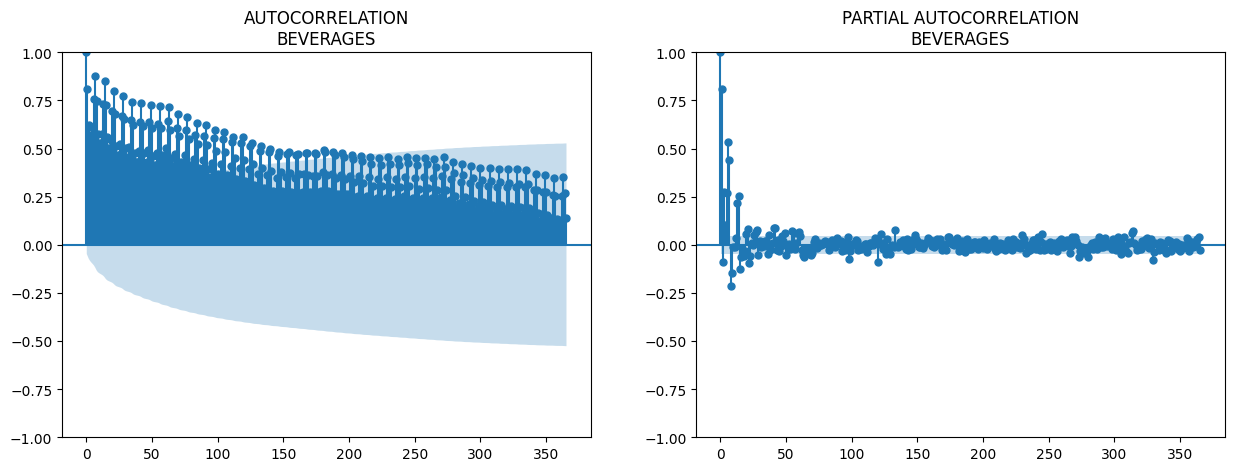

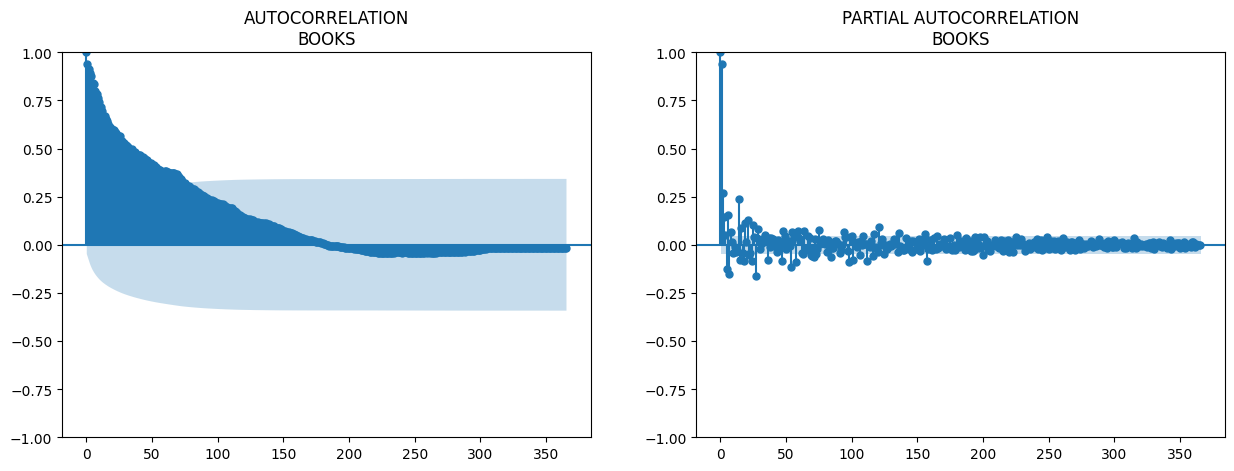

In [9]:
a = df_train[(df_train["sales"].notnull())].groupby(["date", "family"]).sales.mean().reset_index().set_index("date")  # noqa: PD004
for _, i in enumerate(a.family.unique()[:5]):
    try:
        fig, ax = plt.subplots(1,2,figsize=(15,5))
        temp = a[(a.family == i)]#& (a.sales.notnull())
        sm.graphics.tsa.plot_acf(temp.sales, lags=365, ax=ax[0], title = "AUTOCORRELATION\n" + i)
        sm.graphics.tsa.plot_pacf(temp.sales, lags=365, ax=ax[1], title = "PARTIAL AUTOCORRELATION\n" + i)
    except Exception:
        pass

List of the lags to test:
16, 20, 30, 45, 365, 730